# Sentiment Analysis

In [6]:
# Imports
import pandas as pd

vec_df = pd.read_csv('saves/3.vectorized_transcripts_df.csv', index_col = 0)
clean_df = pd.read_csv('saves/2.cleaned_transcripts_df.csv', index_col = 0)

clean_df

,Transcript
Lousic C.K.,intro fade the music out let roll hold there ...
Dave Chappelle,this be dave he tell dirty joke for a living t...
Ricky Gervais,hello hello how you do great thank you wow cal...
Bo Burham,bo what old macdonald have a farm e I e I o an...
Bill Burr,all right thank you thank you very much thank ...
Jim Jefferies,lady and gentleman please welcome to the stage...
John Mulaney,armed with boyish charm and a sharp wit the fo...
Hasan Minhaj,what be up davis what be up I be home I have t...
Ali Wong,lady and gentleman please welcome to the stage...
Anthony Jeselnik,thank you thank you thank you san francisco th...


### Overall sentiment

In [7]:
# Imports
from textblob import TextBlob

polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

clean_df['Polarity'] = clean_df['Transcript'].apply(polarity)
clean_df['Subjectivity'] = clean_df['Transcript'].apply(subjectivity)

clean_df

,Transcript,Polarity,Subjectivity
Lousic C.K.,intro fade the music out let roll hold there ...,0.056983,0.519770
Dave Chappelle,this be dave he tell dirty joke for a living t...,0.007972,0.508685
Ricky Gervais,hello hello how you do great thank you wow cal...,0.066654,0.499427
Bo Burham,bo what old macdonald have a farm e I e I o an...,0.059084,0.554730
Bill Burr,all right thank you thank you very much thank ...,0.024863,0.526236
Jim Jefferies,lady and gentleman please welcome to the stage...,0.057215,0.518569
John Mulaney,armed with boyish charm and a sharp wit the fo...,0.074073,0.491351
Hasan Minhaj,what be up davis what be up I be home I have t...,0.087878,0.459266
Ali Wong,lady and gentleman please welcome to the stage...,0.066525,0.484513
Anthony Jeselnik,thank you thank you thank you san francisco th...,0.042445,0.563430


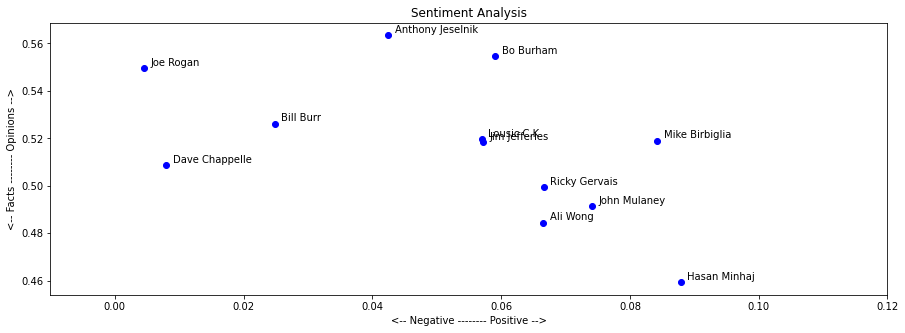

In [22]:
# Imports
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))

for index, comedian in enumerate(clean_df.index):
    x = clean_df['Polarity'].loc[comedian]
    y = clean_df['Subjectivity'].loc[comedian]
    
    plt.scatter(x, y,  c = 'b')
    plt.text(x + .001, y + .001, comedian, fontsize = 10)
    plt.xlim(-.01, .12) 

plt.title('Sentiment Analysis')
plt.xlabel('<-- Negative -------- Positive -->')
plt.ylabel('<-- Facts -------- Opinions -->')

plt.show()

### Over-time sentiment

In [54]:
num_of_splits = 10

splitted_scripts = []
for i, comedian in enumerate(clean_df.index):
    
    script = clean_df['Transcript'][comedian]
    split_len = len(script) // num_of_splits
    
    polarities = []
    subjectivities = []
    for i in range(num_of_splits):
        split = script[i * split_len: (i + 1) * split_len]
        
        polarities.append(TextBlob(split).sentiment.polarity)
        subjectivities.append(TextBlob(split).sentiment.subjectivity)
        
    splitted_scripts.append((comedian, split, polarities, subjectivities))

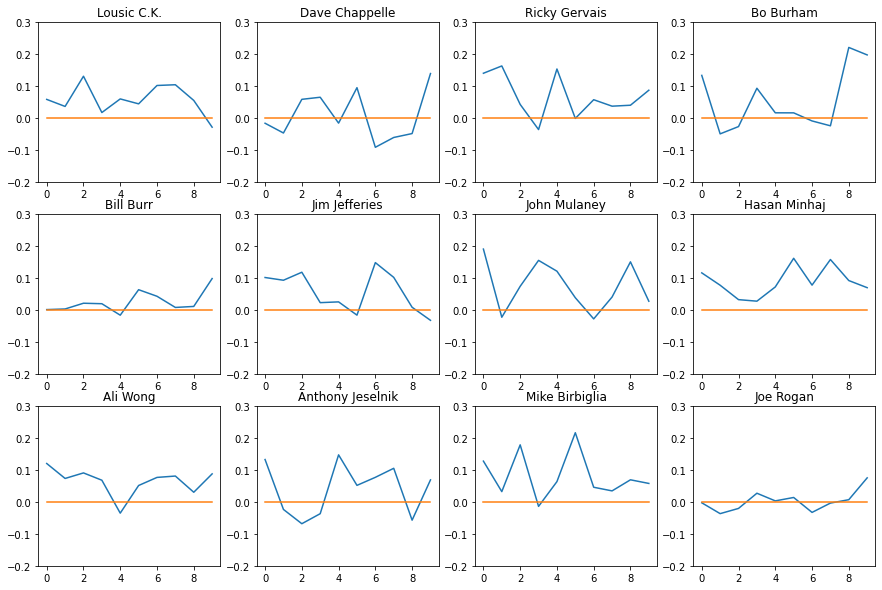

In [57]:
# Imports
import numpy as np

plt.figure(figsize = (15, 10))

for i, value in enumerate(splitted_scripts):    
    comedian, split, polarity, subjectivity = value
    
    plt.subplot(3, 4, i + 1)
    plt.plot(np.arange(0,10), polarity)
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(comedian)
    plt.ylim(ymin = -.2, ymax = .3)
    
plt.show()

## Save the modified data

In [59]:
clean_df.to_csv('saves/4.sentimented_df.csv')